# 1.Machine Learning: The Problem Setting

Typically in machine learning you are dealing with two variables in your data, dependent and independent. However that are times when you can have more variables in your dat and this is known as multivariant data.

Learning falls into two catagories:
<ol>
<li> 
Supervised learning - this is when you have the outcome of your data set and use it to trian your model. You'll have your dependent and independent data and you use split into training and test set. You will use the training set to train the modle and the test set will be use to compare the model with the actuals results. There are additionaly two type types of problems we want to solve:
<ol>    
<li>     Classification (logistic) - In this instance we want to group or classify our data set into one or more classes. An example would be if you were looking at tumors and wanted to identify if they were benign and malignant. Or if you you were looking at handwritten number data and wanted to assign each vector to a finite number or discrete categories. In each example we are looking to classifing the data into a discrete category, yes, no, 0-9.
</li>
<li>     Regression (regression) - here we want our output to be continuous, how much money you'll earn base on years of experience, length of salmon as a function of age and weight. Here our output could be any range of value, $100,253.45 base on years of experience, 3'6'', or 3'6.25''.
</li>
</ol>
<li>
Unsupervised leanring (clustering) - is when you dont have the outcome in your data set only the training data. Here we want to identify groups of similary examples within the data, also known as clustering or determining the distribution of data within the space, known as density estimator. Densitiy estimation aims to take the data from a high dimension into a smaller space of two or three dimension for visualization.
</li>
</ol>
https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

## 2.Loading an example dataset
Lets load the iris and digits data set

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

The dataset we loaded into each of the variables can be thought of as a dictionary-like objects that holds the data and metadata. The data is stored in the .data member which is ina n_sample, n_features array. Or think of it as s x f matrix where s is the sample, s1,s2, and f is the column of features, feature 1, feature 2... If you are dealing with supervised learning you will also have a .target member.

Lets call the data for the digits data...

In [7]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## 3.Learning and Predicting
Lets start with the digits data set. For this we are going to use the digits data set. We will be trying to predict a number, given an 8x8 matrix of the image. We are going to if an <b><i>estimator</b></i> to be able to <b><i>predict</b></i> the class (0-9) to which unseen matrix belongs.
<br>
<br>
An estimator for classification is a python <b><i>object</b></i> that implements fit(X,y) and predict(T)
<br>
<br>
sklearn.svm.SVC is an <b><i>estimator</b></i> that implements the support vector <b><i>classification</b></i>. The estimator constructor takes as arguments the model's parameter.

In [9]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.) #here they set the value of gamma, you can tune using grid search or cross validation
#grid-search https://scikit-learn.org/stable/modules/grid_search.html
#cross-validation https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Since svm.SVC is an <b><i>estimator</b></i>, we are going to fit the estimator <b><i>instance</b></i> to clf. To do this, we pass the <b><i>training</b></i> set to the <b><i>fit</b></i> method. For the <b><i>training</b></i> set we are going to tuse the images from our dataset, the blured 8x8 matrix data, but we will leave the last image out as we will be trying to predict what that last blured image will be. To do this we will slice the data to get a new array with all the dataset except for the last one, [:-1]

<b>estimator.fit(all dataset but the last one, to all targets but the last one)</b>
<br>
<br>
Then to predict the last dataset
<br>
<br>
<b>estimator.predict(last dataset)

In [12]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [19]:
#now that the data has been fitted to the target, we can predict what the last data set will be
clf.predict(digits.data[-1:]) #[-1:]class is list

array([8])

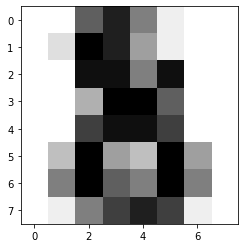

In [21]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r) #[-1] class is int

In [22]:
digits.target[-1]

8

After initialized the <b><i>estimator</b></i>, we <b><i>fit (training)</b></i> the dataset with the <b><i>target (test)</b></i> dataset, then we call <b><i>predict</b></i> to <i>determinthe image from the training set that best matches the last image.

## 4. Model Persistence (pickle)
If you want to save a model, we can do that using <i><b>Python's</i></b> built-in persistence model, pickle. Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. Its converts python objects, dict, list, to a character stream so that you can reconstruct data object to another python script.

Think of the pickle module as a regular pickle. You preserve the cucumber by pickling it and consume it later. Same thing here, we are pickling the data so that we can reconstruct the model later else where if need be.

1) Load the dataset
<br>
<br>
2) Initialize the estimator with svm <i>clf = svm.SVC()</i>
<br><br>
3) Fit the data using estimator instance clf
<br>
<t>    A.Fit the training set to the test set. All of the digits data except the last dataset
<br><br>
4) Predict the last dataset

In [18]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC() #set svm.SVC estimator to clf
X, y = datasets.load_iris(return_X_y=True) #returns data as (data,target) array instead of bunch, X data, y target

In [10]:
q=datasets.load_iris()

In [11]:
type(q)
q

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
x = datasets.load_iris(return_X_y=True)

In [13]:
type(x)
x

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [16]:
q.data[0] #loaded as bunch

array([5.1, 3.5, 1.4, 0.2])

In [17]:
x[0][0] #loaded as array

array([5.1, 3.5, 1.4, 0.2])

In [19]:
clf.fit(X,y)

SVC()

In [21]:
import pickle
s = pickle.dumps(clf) #writes object to the open file object
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [22]:
y[0]

0

For big data using joblib (joblib.dump & joblib.load) may be more of an interesting replacement for pickle but it only pickles to disk and not string

In [23]:
from joblib import dump, load 
dump(clf, 'filename.joblib') #here we are replacing pickle dump with joblib

['filename.joblib']

In [24]:
clf = load('filename.joblib') #then reload the pickled model

Note that pickle has some security and maintainability issues. Please refer to section Model persistence for more detailed information about model persistence with scikit-learn.

## 5.Conventions
There are certain rules in scikit-learn to make the behavior more predictive. Info can be found here:
https://scikit-learn.org/stable/glossary.html#glossary

### Type Casting
By defualt imput will be cast to float64

In [40]:
import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10,2000)
X = np.array(X,dtype='float32')
X.dtype

dtype('float32')

In [42]:
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype

dtype('float64')

In [34]:
Here we cast the float32 to float64 with fit_transformat(X)
Regression targest are cast to float64 and classification targets are maintained:

In [ ]:
Next we see that the format we used to fit, predict will return to use the same format

In [44]:
from sklearn import datasets
from sklearn.svm import SVC

iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)

SVC()

In [54]:
iris.target #an integer array was used for fitting

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
list(clf.predict(iris.data[:3])) #and an integer array was returned

[0, 0, 0]

In [49]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC()

In [56]:
iris.target_names[iris.target] #name array was used for fitting on the second predict

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [57]:
list(clf.predict(iris.data[:3])) #so a name array was returned

['setosa', 'setosa', 'setosa']

## Refitting and updating parmaeters
We can update the kernal for the estimator after it has been constructed by using the set_parameeter() method. If you call fit more than once, it will override what was already learned by the previous fit()

In [67]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X,y =load_iris(return_X_y=True)

clf = SVC() #this looks strange bc we import SCV as oppose to our other example where we import svm and call SVC with svm
clf.set_params(kernel='linear').fit(X,y) #update the parameter and fit
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [68]:
clf.set_params(kernel='rbf').fit(X, y)
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In this example we replace the default rbf kernal with linear using svc.set_params() after the estimator has been constructed.

Then we changed it back to rbf to refit the estimator to make a second prediction

## Multiclass vs. Multilabel Fitting
Multiclass is a classification problem where we have more than classify more than /two classes.

Multilable is a multiclass multioutput target where each output is binary.

https://scikit-learn.org/stable/glossary.html#term-multiclass
https://scikit-learn.org/stable/modules/multiclass.html

In [69]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier #this strat consist in fitting one classifier per class
from sklearn.preprocessing import LabelBinarizer #preprocessing is when we change the data to something more suitable for downstream estimators

Preprocessing-chaning the raw data into some sort of lable. Ex. will be if you had a dataset like [cold, cold,hot,warm, warm] If we watned to preprocess or relable this, the new dataset will look something like [0,0,1,2,2]

https://stackoverflow.com/questions/50473381/scikit-learns-labelbinarizer-vs-onehotencoder
<br>
https://scikit-learn.org/stable/modules/preprocessing.html
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

In [73]:
X = [[1,2],[2,4],[4,5],[3,2],[3,1]]
y = [0,0,1,1,2]

classif = OneVsRestClassifier(estimator=SVC(random_state=0)) #use the onevsrest classifier to fit the data with multiple class
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

Here the classifier is a 1d arry of multiclass lables and the predict() method provides corresponding multiclass prediction.

We can also fit a 2d arry of binary lables. So same as above, classify the data with multiple class but return a 2d arrya

In [75]:
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

**Take notice that the forth and fifth instance are all zeros. This means that they match none of the three lables fit upon. We can use multilable outputs, to have the instance assign multiple labels

In [76]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])